In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
dataset=pd.read_csv('C:/Users/ahmad/OneDrive/Desktop/.,l;;l;l;l ;l/cab/train.csv')
print(dataset)
print(dataset.isnull().mean())
p=dataset['y']
#dataset=dataset.iloc[: ,[1]].values
#dataset=dataset.astype('float32')
#dataset

                      time     y
0      2021-09-01 00:01:00  7269
1      2021-09-01 00:02:00  7235
2      2021-09-01 00:03:00  7206
3      2021-09-01 00:04:00  7166
4      2021-09-01 00:05:00  7148
...                    ...   ...
96326  2021-11-06 23:55:00  9276
96327  2021-11-06 23:56:00  9191
96328  2021-11-06 23:57:00  9133
96329  2021-11-06 23:58:00  9047
96330  2021-11-06 23:59:00  8972

[96331 rows x 2 columns]
time    0.0
y       0.0
dtype: float64


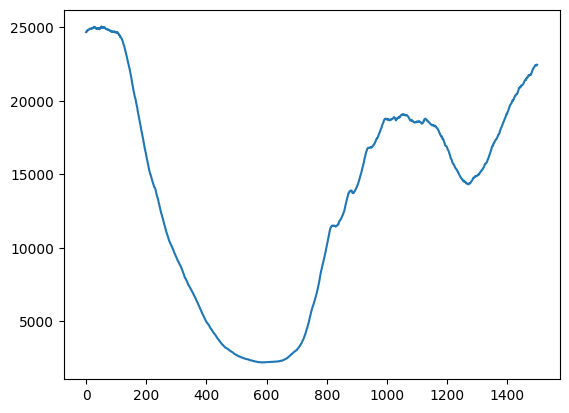

In [3]:
plt.plot(dataset.iloc[1100:2600 , [1]].values)
#plt.plot(dataset.iloc[:3000 , [1]].rolling(window=1000).mean())

In [4]:
dataset['SMA']=dataset['y'].rolling(window=40000).mean().shift(-40000//2)
my_dataset=dataset.iloc[40000//2:-40000//2 ,[2]]
my_dataset=my_dataset.dropna()

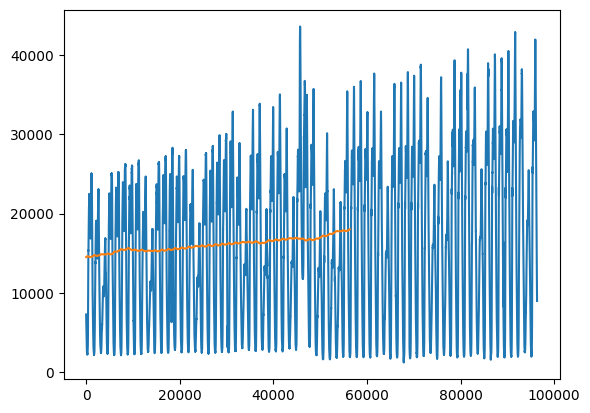

In [5]:
plt.plot(dataset['y'])
plt.plot(my_dataset.values)

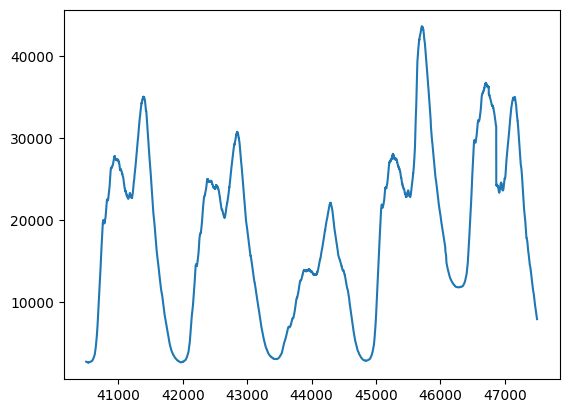

In [170]:
plt.plot(s[40500:47500],np.array(filtered_data)[40500:47500])

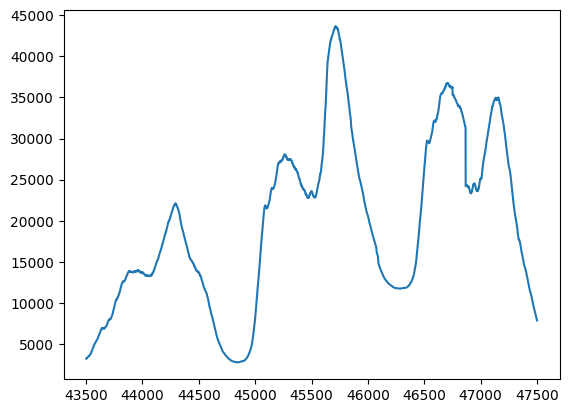

In [12]:
plt.plot(s[43500:47500],z[43500:47500])

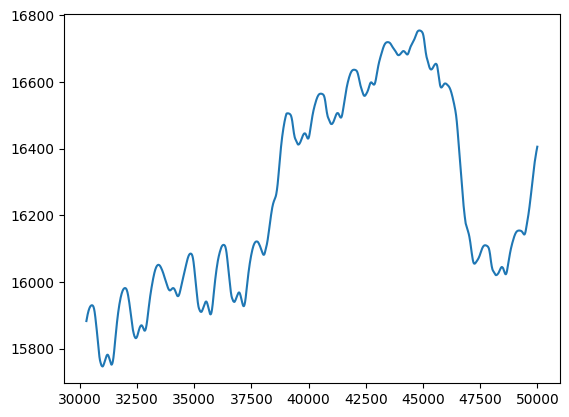

In [10]:
plt.plot(np.arange(50000)[30290:50000],my_dataset[30290:50000])

22106.0
290
22106.0
2770.0
842
2770.0


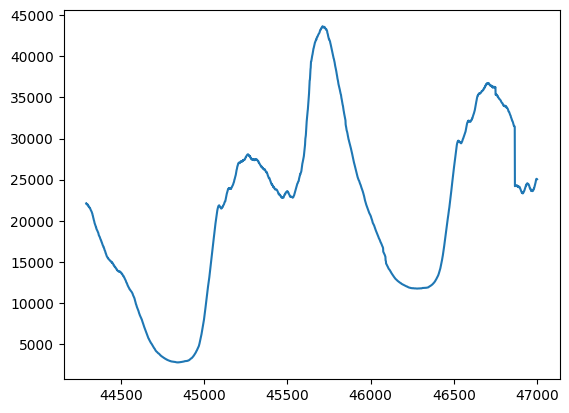

In [28]:
plt.plot(s[44290:47000],z[44290:47000])
print(max(z[44000:45000]))
print(np.argmax(z[44000:45000]))
print(z[44290])
print(min(z[44000:45000]))
print(np.argmin(z[44000:45000]))
print(z[44842])

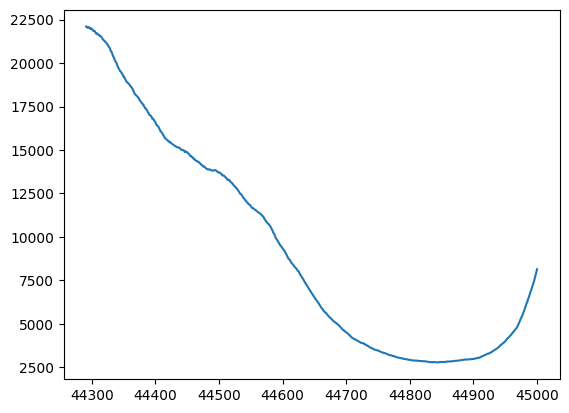

In [30]:
plt.plot(s[44290:45000],z[44290:45000])

# ===============================================================

# now lets begin


In [6]:
my_dataset=my_dataset.dropna().values

In [7]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
my_dataset=mm.fit_transform(my_dataset)
train_size=int(len(my_dataset)*0.80)
train_data=my_dataset[0:train_size,:]
test_data=my_dataset[train_size:,:]

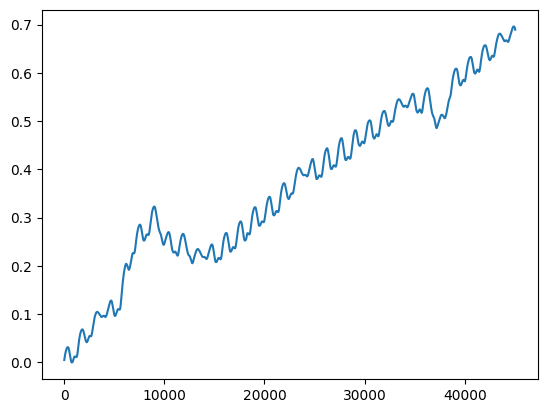

In [10]:
plt.plot(y_train)

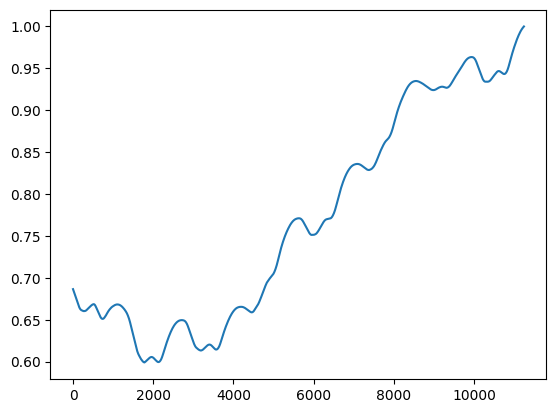

In [11]:
plt.plot(y_test)

In [8]:
look_back=20
def create_lstm_dataset(dataset,look_back):
    x=[]
    y=[]
    for i in range(len(dataset)-look_back):
        a=dataset[i:i+look_back,[0]]
        x.append(a)
        y.append(dataset[i+look_back,[0]])
    return np.array(x),np.array(y)
x_train,y_train=create_lstm_dataset(train_data,look_back)
x_test,y_test=create_lstm_dataset(test_data,look_back)
len(x_train)
print(x_train.shape)
print(y_train.shape)
print(y_test.shape)

(45044, 20, 1)
(45044, 1)
(11247, 1)


In [9]:
print(x_test.shape)
print(y_test.shape)

(11247, 20, 1)
(11247, 1)


In [381]:
import tensorflow as tf
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(50,input_shape=(look_back,1),activation='relu',return_sequences=True))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(50,activation='relu',return_sequences=True))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(50,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(1,activation='linear'))
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,batch_size=32,epochs=20,validation_split=0.33)

Epoch 1/20
944/944 [==============================] - 21s 19ms/step - loss: 0.0013 - val_loss: 0.0074
Epoch 2/20
944/944 [==============================] - 21s 22ms/step - loss: 4.2730e-04 - val_loss: 0.0062
Epoch 3/20
944/944 [==============================] - 21s 23ms/step - loss: 3.0643e-04 - val_loss: 0.0034
Epoch 4/20
944/944 [==============================] - 22s 23ms/step - loss: 2.6765e-04 - val_loss: 0.0034
Epoch 5/20
944/944 [==============================] - 21s 23ms/step - loss: 2.6094e-04 - val_loss: 0.0036
Epoch 6/20
944/944 [==============================] - 22s 23ms/step - loss: 2.4309e-04 - val_loss: 0.0036
Epoch 7/20
944/944 [==============================] - 23s 24ms/step - loss: 2.3941e-04 - val_loss: 0.0044
Epoch 8/20
944/944 [==============================] - 21s 22ms/step - loss: 2.4046e-04 - val_loss: 0.0038
Epoch 9/20
944/944 [==============================] - 22s 23ms/step - loss: 2.3495e-04 - val_loss: 0.0037
Epoch 10/20
944/944 [=============================

352/352 [==============================] - 2s 5ms/step


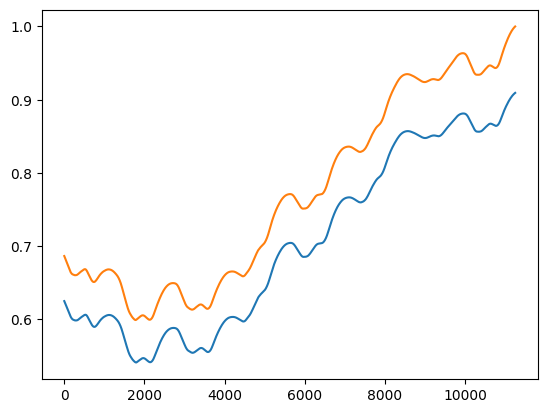

In [382]:
import matplotlib.pyplot as plt
y_pred=model.predict(x_test)
plt.plot(y_pred)

plt.plot(y_test)